In [89]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date handling
import datetime as dt

# Set professional theme
sns.set(style="whitegrid")

In [90]:
# Load Amazon sales dataset
df = pd.read_csv("Amazon.csv")

In [91]:
# Display first 5 rows
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,05-01-2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,08-03-2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,27-01-2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-2019,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [92]:
# Dataset shape
df.shape

(1000, 17)

In [93]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [94]:
# Statistical summary
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [95]:
# Check missing valu# Check missing values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [96]:
# Rename columns for consistency 
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)

In [97]:
# Verify column names
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'total', 'date',
       'time', 'payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'rating'],
      dtype='object')

In [98]:
# Convert date column to datetime
#df['date'] = pd.to_datetime(df['date'])
# Convert date column to datetime (day-month-year format)
df['date'] = pd.to_datetime(
    df['date'],
    dayfirst=True,
    errors='coerce'
)


In [99]:
# Extract month
df['month'] = df['date'].dt.month

# Extract day
df['day'] = df['date'].dt.day


In [100]:
df[['date', 'month', 'day']].head()

,date,month,day
0,2019-01-05,1,5
1,2019-03-08,3,8
2,2019-03-03,3,3
3,2019-01-27,1,27
4,2019-02-08,2,8


In [101]:
# Total revenue by city
city_sales = (
    df.groupby('city')['total']
      .sum()
      .sort_values(ascending=False)
)

In [102]:
# Branch Performance Analysis
branch_performance = (
    df.groupby(['city', 'branch'])['total']
      .sum()
      .reset_index()
      .sort_values(by='total', ascending=False)
)

In [103]:
# Product Line Analysis
product_sales = (
    df.groupby('product_line')['quantity']
      .sum()
      .sort_values(ascending=False)
)

In [104]:
# Convert time column to datetime with specified format
df['time'] = pd.to_datetime(
    df['time'],
    format='%H:%M',
    errors='coerce'
)

# Extract hour
df['hour'] = df['time'].dt.hour

# Create time-of-day feature
def get_time_of_day(hour):
    if hour < 12:
        return "Morning"
    elif hour < 18:
        return "Afternoon"
    else:
        return "Evening"

df['time_of_day'] = df['hour'].apply(get_time_of_day)


In [105]:
# Sales by time of day
time_sales = df.groupby('time_of_day')['total'].sum()
time_sales

time_of_day
Evening    322966.749
Name: total, dtype: float64

In [106]:
payment_distribution = df['payment'].value_counts()
payment_distribution

payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

In [107]:
# Customer Rating Analysis
avg_rating_city = (
    df.groupby('city')['rating']
      .mean()
      .round(2)
)

In [108]:
# avg_rating_city
# Daily Sales Trend

daily_sales = (
    df.groupby('date')['total']
      .sum()
      .reset_index()
)

In [109]:
# Check data (optional – debug)
print(daily_sales.head())

        date      total
0 2019-01-01  4745.1810
1 2019-01-02  1945.5030
2 2019-01-03  2078.1285
3 2019-01-04  1623.6885
4 2019-01-05  3536.6835


In [110]:
# Cumulative Sales (Running Total)
daily_sales['cumulative_sales'] = daily_sales['total'].cumsum()
daily_sales.head()

,date,total,cumulative_sales
0,2019-01-01,4745.1810,4745.1810
1,2019-01-02,1945.5030,6690.6840
2,2019-01-03,2078.1285,8768.8125
3,2019-01-04,1623.6885,10392.5010
4,2019-01-05,3536.6835,13929.1845


In [111]:
# Profitability Analysis
profit_by_product = (
    df.groupby('product_line')['gross_income']
      .sum()
      .sort_values(ascending=False)
)

In [112]:
# profit_by_product
# High-Value Transactions
average_invoice = df['total'].mean()

high_value_orders = df[df['total'] > average_invoice]
high_value_orders.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,...,time,payment,cogs,gross_margin_percentage,gross_income,rating,month,day,hour,time_of_day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,NaT,Ewallet,522.83,4.761905,26.1415,9.1,1,5,NaN,Evening
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,NaT,Credit card,324.31,4.761905,16.2155,7.4,3,3,NaN,Evening
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,NaT,Ewallet,465.76,4.761905,23.2880,8.4,1,27,NaN,Evening
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,NaT,Ewallet,604.17,4.761905,30.2085,5.3,2,8,NaN,Evening
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,...,NaT,Ewallet,597.73,4.761905,29.8865,4.1,3,25,NaN,Evening


In [113]:
# =========================================================
# BUSINESS KPI SUMMARY
# =========================================================
# Purpose: Summarize overall business performance metrics

kpi_summary = {
    "Total Revenue": round(df['total'].sum(), 2),
    "Total Transactions": df.shape[0],
    "Average Invoice Value": round(df['total'].mean(), 2),
    "Average Customer Rating": round(df['rating'].mean(), 2),
    "Total Profit": round(df['gross_income'].sum(), 2)
}

# Convert KPI summary into a DataFrame (dashboard-ready)
kpi_df = pd.DataFrame(
    list(kpi_summary.items()),
    columns=["KPI", "Value"]
)

print(kpi_df)

                       KPI      Value
0            Total Revenue  322966.75
1       Total Transactions    1000.00
2    Average Invoice Value     322.97
3  Average Customer Rating       6.97
4             Total Profit   15379.37


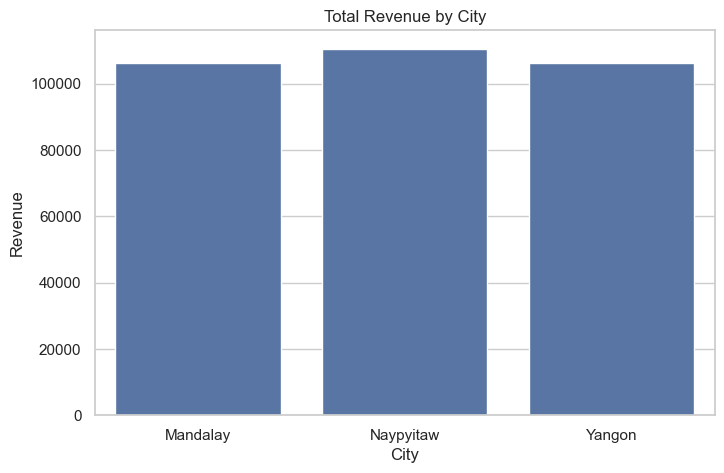

In [114]:
# City-wise revenue analysis
city_sales = (
    df.groupby('city')['total']
      .sum()
      .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(data=city_sales, x='city', y='total')
plt.title("Total Revenue by City")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.show()

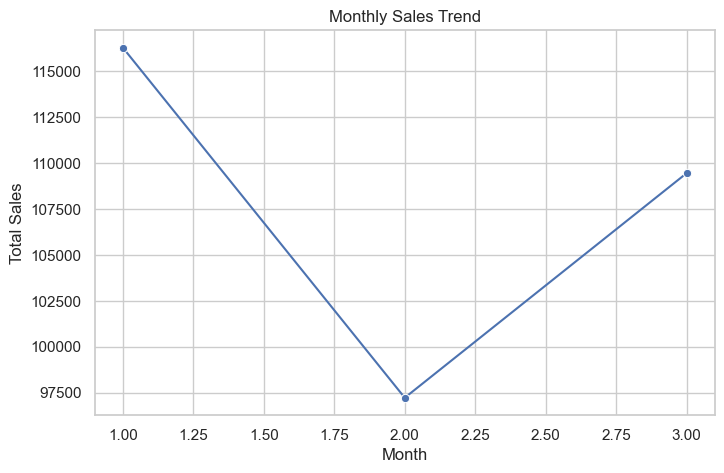

In [115]:
# Monthly sales trend
monthly_sales = (
    df.groupby('month')['total']
      .sum()
      .reset_index()
)

plt.figure(figsize=(8,5))
sns.lineplot(data=monthly_sales, x='month', y='total', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

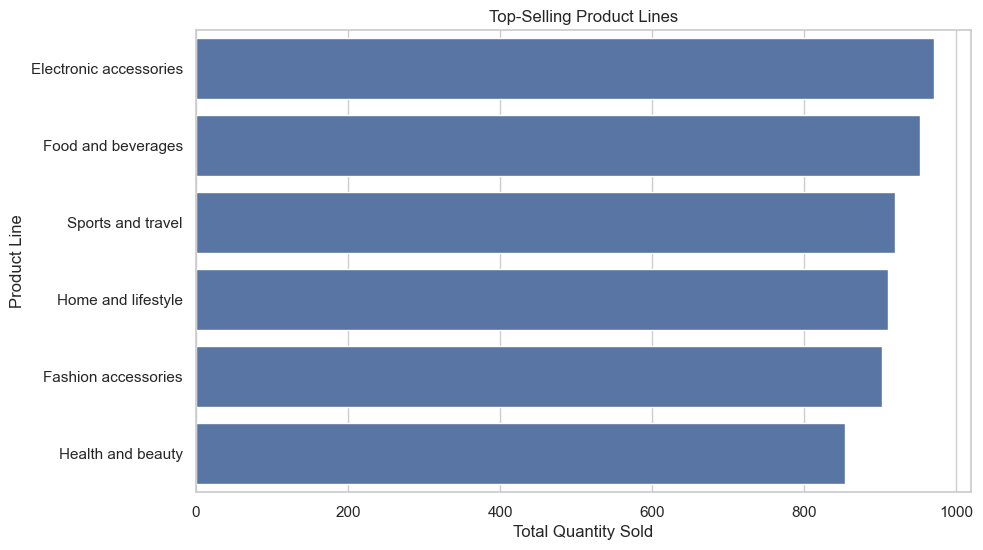

In [116]:
# Product line performance by quantity sold
product_sales = (
    df.groupby('product_line')['quantity']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=product_sales, y='product_line', x='quantity')
plt.title("Top-Selling Product Lines")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Line")
plt.show()

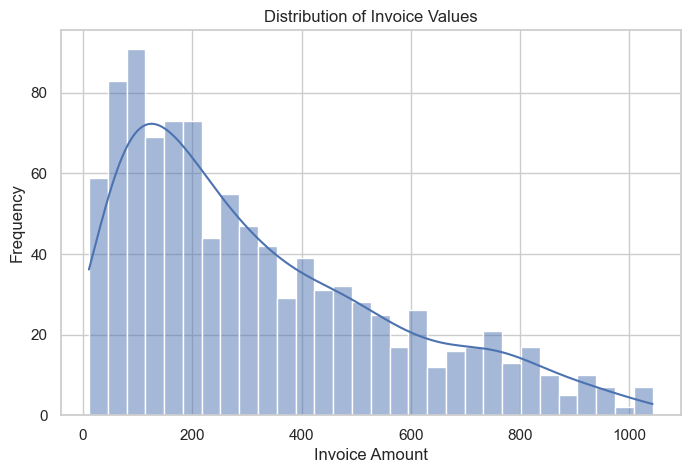

In [117]:
# Distribution of invoice totals
plt.figure(figsize=(8,5))
sns.histplot(df['total'], bins=30, kde=True)
plt.title("Distribution of Invoice Values")
plt.xlabel("Invoice Amount")
plt.ylabel("Frequency")
plt.show()

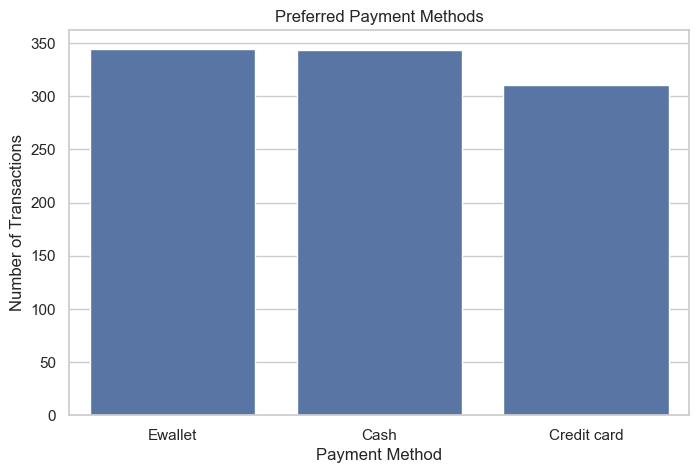

In [118]:
# Payment method usage
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='payment')
plt.title("Preferred Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.show()

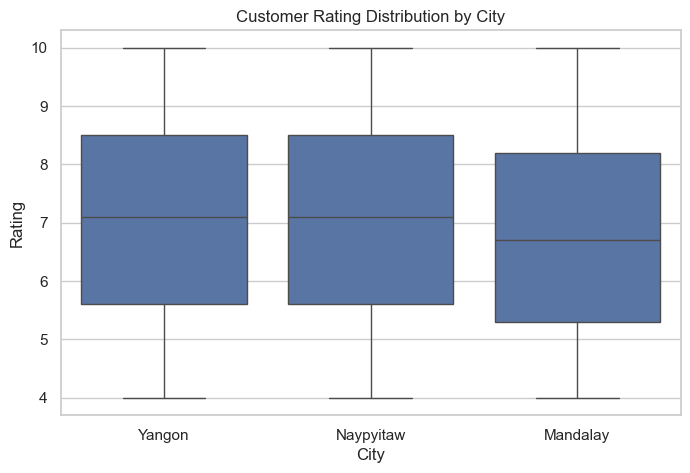

In [119]:
# Customer rating comparison by city
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='city', y='rating')
plt.title("Customer Rating Distribution by City")
plt.xlabel("City")
plt.ylabel("Rating")
plt.show()

In [120]:
# ---------------------------------------------------------
# KEY INSIGHTS
# ---------------------------------------------------------
# • Yangon emerges as the highest revenue-generating city,
#   indicating stronger customer demand and sales performance.
#
# • Sales volume peaks during evening hours, suggesting that
#   customers prefer shopping after regular working hours.
#
# • Certain product lines generate high sales volume but
#   contribute relatively lower profit margins, highlighting
#   opportunities for pricing or cost optimization.
#
# • Customer ratings remain fairly consistent across cities,
#   reflecting stable service quality across all branches.
#
# • Digital payment methods (E-wallet and credit cards) show
#   strong adoption, indicating a shift toward cashless transactions.

# ---------------------------------------------------------
# BUSINESS RECOMMENDATIONS
# ---------------------------------------------------------
# • Allocate more staff and promotional efforts during evening
#   hours to capitalize on peak customer traffic.
#
# • Focus marketing strategies on high-margin product lines
#   rather than only high-volume items to improve profitability.
#
# • Introduce targeted offers and loyalty programs in lower-
#   performing cities to boost customer engagement and sales.
#
# • Encourage digital payment usage by offering small incentives,
#   which can improve transaction efficiency and reduce cash handling.

# ---------------------------------------------------------
# CONCLUSION
# ---------------------------------------------------------
# This project demonstrates an end-to-end sales analysis using
# SQL and Python, combining data cleaning, feature engineering,
# KPI evaluation, and visualization.
#
# The insights and recommendations derived from this analysis
# can support data-driven decision-making and help improve
# overall sales performance and operational efficiency.
